In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [148]:
import pandas as pd
file_handler = open("AQIEMS1.csv", "r")
df = pd.read_csv(file_handler, sep = ",")
df = df.rename(columns = {"Defining Parameter":"Defining_Parameter"})


#We used this for further cleaning in order make data analysis easier

In [149]:
df = df.rename(columns = {"ZIP Code":"ZIP_Code"})


#We used this for further cleaning in order make data analysis easier

In [150]:
df['SYMPTOM_PRIMARY'].value_counts()

BREATHING PROBLEM                                     49531
WEAKNESS                                              47001
NAUSEA                                                17998
MALAISE                                               10208
DYSPNEA                                                4390
PALPITATIONS                                           2868
NAUSEA WITH VOMITING, UNSPECIFIED                      2058
COUGH                                                  1248
FATIGUE                                                 973
WHEEZING                                                538
EDEMA, UNSPECIFIED                                      408
APNEA                                                   303
PAIN, CHEST (CARDIAC)                                   285
CARDIAC ARREST                                          211
CHEST PAIN                                              179
BRADYCARDIA, UNSPECIFIED                                175
SHORTNESS OF BREATH                     

In [151]:
df['SYMPTOM_PRIMARY'] = df['SYMPTOM_PRIMARY'].replace(['BREATHING PROBLEM','WHEEZING', 'APNEA', 'COUGH', 'DYSPNEA', 'NASAL CONGESTION', 'MOUTH BREATHING', 'DYSPNEA', 'SHORTNESS OF BREATH'],'RESPIRATORY')

In [152]:
df['SYMPTOM_PRIMARY'] = df['SYMPTOM_PRIMARY'].replace(['NAUSEA','VOMITING', 'NAUSEA WITH VOMITING, UNSPECIFIED','VOMITING, PROJECTILE'],'GASTROINTESTINAL')

In [153]:
df['SYMPTOM_PRIMARY'] = df['SYMPTOM_PRIMARY'].replace(['WEAKNESS','MALAISE', 'CARDIORESPIRATORY ARREST', 'FATIGUE'],'GENERAL/MULTIPLE SYSTEMS')

In [154]:
df['SYMPTOM_PRIMARY'] = df['SYMPTOM_PRIMARY'].replace(['ACUTE SORE THROAT','CHEST PAIN','PAIN','PAIN, CHEST ON BREATHING', 'PAIN, JAW', 'PAIN IN ARM, UNSPECIFIED', 'PAIN, ANTERIOR CHEST-WALL', 'PAIN, CHEST (CARDIAC)','EDEMA, LOCAL (PITTING)','CARDIAC ARREST, CAUSE UNSPECIFIED' 'PAIN, CHEST ON BREATHING', 'PAIN, HEADACHE', 'PAIN, THROAT'],'PAIN')

In [155]:
df['SYMPTOM_PRIMARY'] = df['SYMPTOM_PRIMARY'].replace(['PALPITATIONS','ELEVATED BLOOD PRESSURE', 'EDEMA', 'CARDIAC ARREST', 'BRADYCARDIA', 'TACHYCARDIA', 'CARDIAC ARREST, CAUSE UNSPECIFIED','EDEMA, UNSPECIFIED','BRADYCARDIA, UNSPECIFIED','ELEVATED BLOOD-PRESSURE','TACHYCARDIA, UNSPECIFIED','CARDIAC ARREST DUE TO UNDERLYING CARDIAC CONDITION','CARDIAC ARREST DUE TO OTHER UNDERLYING CONDITION','CARDIAC ARREST', 'CARDIAC, CAUSE UNSPECIFIED', 'CARDIAC, LOCAL'],'CARDIAC')

In [156]:
df['SYMPTOM_PRIMARY'].describe()



count                       139154
unique                           5
top       GENERAL/MULTIPLE SYSTEMS
freq                         58197
Name: SYMPTOM_PRIMARY, dtype: object

In [157]:
df['AQI'].describe()

count    139154.000000
mean         41.894922
std          18.264977
min           0.000000
25%          31.000000
50%          40.000000
75%          52.000000
max         217.000000
Name: AQI, dtype: float64

In [158]:
df['Category'].describe()

count     139154
unique         3
top         Good
freq      101748
Name: Category, dtype: object

In [159]:
df['Defining_Parameter'].describe()

count     139154
unique         6
top        PM2.5
freq       70497
Name: Defining_Parameter, dtype: object

In [160]:
#Encoding the required columns, i.e, SYMPTOM_PRIMARY,Category, Defining_Parameter

from sklearn.preprocessing import LabelEncoder
le_SYMPTOM_PRIMARY = LabelEncoder()
le_Category = LabelEncoder()
le_Defining_Parameter = LabelEncoder()
df['SYMPTOM_PRIMARY_encoded'] = le_SYMPTOM_PRIMARY.fit_transform(df.SYMPTOM_PRIMARY)
df['Category_encoded'] = le_Category.fit_transform(df.Category)
df['Defining_Parameter_encoded'] = le_Defining_Parameter.fit_transform(df.Defining_Parameter)

In [161]:
df["SYMPTOM_PRIMARY_encoded"].replace([''])
#checking the datatypes

0         4
1         4
2         1
3         1
4         2
         ..
139149    2
139150    2
139151    2
139152    4
139153    2
Name: SYMPTOM_PRIMARY_encoded, Length: 139154, dtype: int32

In [73]:
df.describe()
#Descriptive table

,ZIP_Code,AQI,SYMPTOM_PRIMARY_encoded,Category_encoded,Defining_Parameter_encoded
count,139154.000000,139154.000000,139154.000000,139154.000000,139154.000000
mean,46840.916186,41.894922,2.615361,0.277987,3.152867
std,663.866870,18.264977,1.224144,0.468044,1.063925
min,46011.000000,0.000000,0.000000,0.000000,0.000000
25%,46237.000000,31.000000,2.000000,0.000000,2.000000
50%,46725.000000,40.000000,2.000000,0.000000,4.000000
75%,47586.000000,52.000000,4.000000,1.000000,4.000000
max,47933.000000,217.000000,4.000000,2.000000,5.000000


In [162]:
x = df['AQI']
y = df['Category_encoded']
from scipy import stats
stats.kruskal(x, y)

KruskalResult(statistic=218251.5309014292, pvalue=0.0)

In [163]:
df

,SYMPTOM_PRIMARY,Facility,City,ZIP_Code,County,Date,AQI,Category,Defining_Parameter,SYMPTOM_PRIMARY_encoded,Category_encoded,Defining_Parameter_encoded
0,RESPIRATORY,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,1/1/2015,32,Good,PM2.5,4,0,4
1,RESPIRATORY,ST VINCENT HOSPITAL,INDIANAPOLIS,46260,Marion,1/1/2015,43,Good,PM2.5,4,0,4
2,GASTROINTESTINAL,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,1/1/2015,32,Good,PM2.5,1,0,4
3,GASTROINTESTINAL,INDIANA UNIVERSITY HEALTH BLOOMINGTON HOSPITAL,BLOOMINGTON,47403,Monroe,1/1/2015,55,Moderate,PM2.5,1,1,4
4,GENERAL/MULTIPLE SYSTEMS,COLUMBUS REGIONAL HOSPITAL,COLUMBUS,47201,Bartholomew,1/1/2015,32,Good,PM2.5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
139149,GENERAL/MULTIPLE SYSTEMS,RIVERVIEW HEALTH,NOBLESVILLE,46060,Hamilton,12/31/2018,20,Good,PM2.5,2,0,4
139150,GENERAL/MULTIPLE SYSTEMS,CLARK MEMORIAL HOSPITAL,JEFFERSONVILLE,47130,Clark,12/31/2018,22,Good,Ozone,2,0,2
139151,GENERAL/MULTIPLE SYSTEMS,PERRY COUNTY MEMORIAL HOSPITAL,TELL CITY,47586,Perry,12/31/2018,22,Good,Ozone,2,0,2
139152,RESPIRATORY,"COMMUNITY HOSPITAL SOUTH, INC.",INDIANAPOLIS,46227,Marion,12/31/2018,38,Good,PM2.5,4,0,4


In [164]:
df['Defining_Parameter_encoded'].value_counts()

4    70497
2    60657
5     6536
1      727
3      675
0       62
Name: Defining_Parameter_encoded, dtype: int64

In [165]:
df['Defining_Parameter'].value_counts()

PM2.5    70497
Ozone    60657
SO2       6536
NO2        727
PM10       675
CO          62
Name: Defining_Parameter, dtype: int64

In [166]:
df['ZIP_Code'].value_counts()

47747    11863
47905     8920
47303     6762
47804     6730
46804     6388
         ...  
46321       75
46112       51
47933       18
46290        8
47630        4
Name: ZIP_Code, Length: 66, dtype: int64

In [167]:
df.corr()


,ZIP_Code,AQI,SYMPTOM_PRIMARY_encoded,Category_encoded,Defining_Parameter_encoded
ZIP_Code,1.000000,-0.128954,0.002541,-0.063185,0.119703
AQI,-0.128954,1.000000,-0.002433,0.779145,-0.072993
SYMPTOM_PRIMARY_encoded,0.002541,-0.002433,1.000000,0.002308,0.014479
Category_encoded,-0.063185,0.779145,0.002308,1.000000,0.159044
Defining_Parameter_encoded,0.119703,-0.072993,0.014479,0.159044,1.000000


In [168]:
# from above, we can see that as category increases, the AQI levels increase. So if it's unhealthy, the AQI is high.

In [169]:
#Applying pearson's correlation
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
print("\nPearson: \n", df.corr(method='pearson'))
print("\nPearson",stats.pearsonr(df['SYMPTOM_PRIMARY_encoded'], df['AQI']))


Pearson: 
                             ZIP_Code       AQI  SYMPTOM_PRIMARY_encoded  \
ZIP_Code                    1.000000 -0.128954                 0.002541   
AQI                        -0.128954  1.000000                -0.002433   
SYMPTOM_PRIMARY_encoded     0.002541 -0.002433                 1.000000   
Category_encoded           -0.063185  0.779145                 0.002308   
Defining_Parameter_encoded  0.119703 -0.072993                 0.014479   

                            Category_encoded  Defining_Parameter_encoded  
ZIP_Code                           -0.063185                    0.119703  
AQI                                 0.779145                   -0.072993  
SYMPTOM_PRIMARY_encoded             0.002308                    0.014479  
Category_encoded                    1.000000                    0.159044  
Defining_Parameter_encoded          0.159044                    1.000000  

Pearson (-0.00243343545618235, 0.364012349650007)


In [170]:
print("\nSpearman: \n", df.corr(method='spearman'))
print("\nSpearman",stats.spearmanr(df['SYMPTOM_PRIMARY_encoded'], df['AQI']))
#there is correlation between category and AQI


Spearman: 
                             ZIP_Code       AQI  SYMPTOM_PRIMARY_encoded  \
ZIP_Code                    1.000000 -0.108241                -0.004249   
AQI                        -0.108241  1.000000                 0.003859   
SYMPTOM_PRIMARY_encoded    -0.004249  0.003859                 1.000000   
Category_encoded           -0.048589  0.769303                 0.003240   
Defining_Parameter_encoded  0.141625 -0.006139                 0.012497   

                            Category_encoded  Defining_Parameter_encoded  
ZIP_Code                           -0.048589                    0.141625  
AQI                                 0.769303                   -0.006139  
SYMPTOM_PRIMARY_encoded             0.003240                    0.012497  
Category_encoded                    1.000000                    0.166827  
Defining_Parameter_encoded          0.166827                    1.000000  

Spearman SpearmanrResult(correlation=0.0038587605652910654, pvalue=0.1500260600708265

In [171]:
print("\nKendall: \n", df.corr(method='kendall'))
print("\nKendall Tau",stats.kendalltau(df['SYMPTOM_PRIMARY_encoded'], df['AQI']))


Kendall: 
                             ZIP_Code       AQI  SYMPTOM_PRIMARY_encoded  \
ZIP_Code                    1.000000 -0.074713                -0.003286   
AQI                        -0.074713  1.000000                 0.003025   
SYMPTOM_PRIMARY_encoded    -0.003286  0.003025                 1.000000   
Category_encoded           -0.040098  0.636716                 0.003051   
Defining_Parameter_encoded  0.113548 -0.001044                 0.011520   

                            Category_encoded  Defining_Parameter_encoded  
ZIP_Code                           -0.040098                    0.113548  
AQI                                 0.636716                   -0.001044  
SYMPTOM_PRIMARY_encoded             0.003051                    0.011520  
Category_encoded                    1.000000                    0.162132  
Defining_Parameter_encoded          0.162132                    1.000000  

Kendall Tau KendalltauResult(correlation=0.0030250441107515917, pvalue=0.1474657540833

C:\Users\akshi\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [172]:
#The best p-value we got is from the Pearson's correlation

<AxesSubplot:>

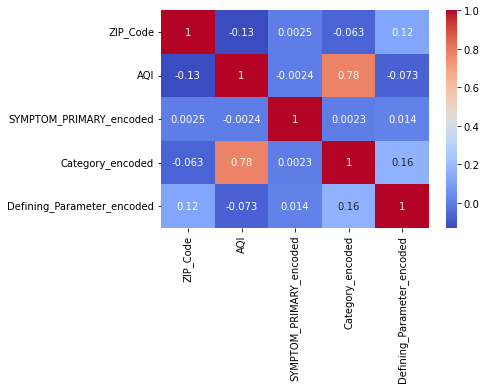

In [173]:
#Doing the heat map of then correlation
import seaborn as sns
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
#Hence, if AQI is high, number of unhealthy days increase. 

In [174]:
import numpy as np
import pandas as pd

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='SYMPTOM_PRIMARY', ylabel='count'>

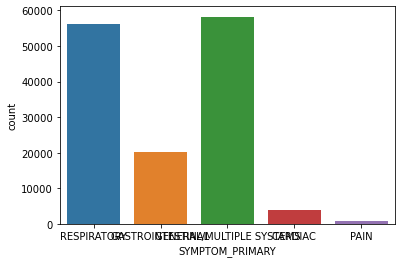

In [176]:
sns.countplot(x='SYMPTOM_PRIMARY',data=df)

<AxesSubplot:xlabel='SYMPTOM_PRIMARY_encoded', ylabel='AQI'>

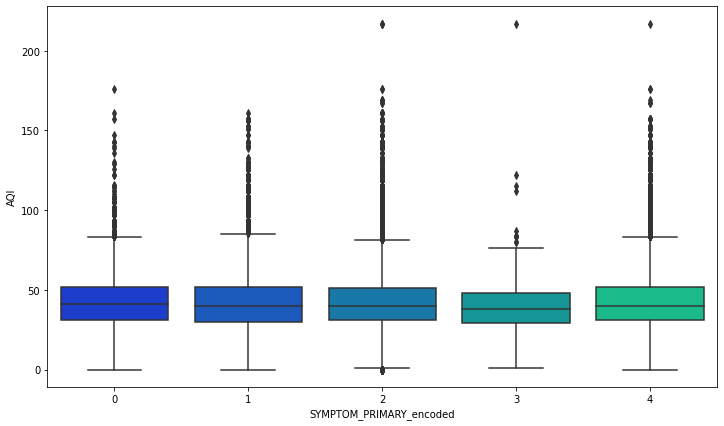

In [177]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='SYMPTOM_PRIMARY_encoded',y='AQI',data=df ,palette='winter')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139154 entries, 0 to 139153
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   SYMPTOM_PRIMARY             139154 non-null  object
 1   Facility                    139154 non-null  object
 2   City                        139154 non-null  object
 3   ZIP_Code                    139154 non-null  int64 
 4   County                      139154 non-null  object
 5   Date                        139154 non-null  object
 6   AQI                         139154 non-null  int64 
 7   Category                    139154 non-null  object
 8   Defining_Parameter          139154 non-null  object
 9   SYMPTOM_PRIMARY_encoded     139154 non-null  int32 
 10  Category_encoded            139154 non-null  int32 
 11  Defining_Parameter_encoded  139154 non-null  int32 
dtypes: int32(3), int64(2), object(7)
memory usage: 11.1+ MB


In [179]:
df.drop('SYMPTOM_PRIMARY',axis=1,inplace=True)

In [180]:
df.drop('Facility',axis=1,inplace=True)

In [181]:
df.drop('City',axis=1,inplace=True)

In [182]:
df.drop('ZIP_Code',axis=1,inplace=True)

In [183]:
df.drop('County',axis=1,inplace=True)

In [184]:
df.drop('Date',axis=1,inplace=True)

In [185]:
df.drop('Category',axis=1,inplace=True)

In [186]:
df.drop('Defining_Parameter',axis=1,inplace=True)

In [187]:
df.columns

Index(['AQI', 'SYMPTOM_PRIMARY_encoded', 'Category_encoded',
       'Defining_Parameter_encoded'],
      dtype='object')

In [188]:
#performing Test Train Split
#Data are fitted to a logit function in order to predict probabilities of events
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Category_encoded',axis=1), 
                                                    df['Category_encoded'], test_size=0.30, 
                                                    random_state=101)

In [189]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
#We have trained the model and generated a prediction 
#f-1 score is almost 1
#And accuracy is 97%
#specificity is precision, and recall is sensitivity
#Prediction for unhealthy days is low, prbably because there are very few instance i.e., 385





              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30494
           1       0.97      0.97      0.97     10868
           2       0.62      0.27      0.38       385

    accuracy                           0.98     41747
   macro avg       0.86      0.75      0.78     41747
weighted avg       0.98      0.98      0.98     41747



C:\Users\akshi\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:xlabel='AQI', ylabel='Category_encoded'>

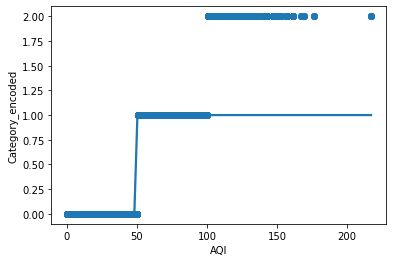

In [191]:
#Plotting a logistic regression curve from 
#https://www.statology.org/logistic-regression/
#https://www.statology.org/plot-logistic-regression-in-python/#:~:text=How%20to%20Plot%20a%20Logistic%20Regression%20Curve%20in,shows%20how%20to%20use%20this%20syntax%20in%20practice.
#Data are fitted to a logit function in order to predict probabilities of events
x = df['AQI']
y = df['Category_encoded']
#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='Defining_Parameter_encoded', ylabel='Category_encoded'>

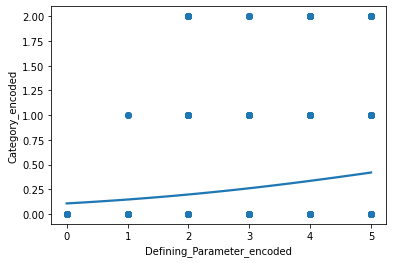

In [192]:
x = df['Defining_Parameter_encoded']
y = df['Category_encoded']
#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

In [193]:
score = logmodel.score(X_test, y_test)
print(score)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
#accuracy is 98%

0.9838551273145376
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30494
           1       0.97      0.97      0.97     10868
           2       0.62      0.27      0.38       385

    accuracy                           0.98     41747
   macro avg       0.86      0.75      0.78     41747
weighted avg       0.98      0.98      0.98     41747



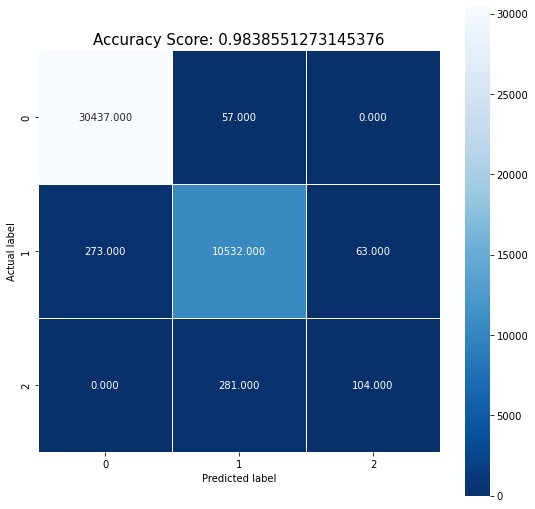

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
score = metrics.accuracy_score(y_test, predictions)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#confusion matrix
#most errors came when we tried to predict 2 (unhealthy)
#


In [195]:
x = df.iloc[:, 1:2].values 
print(x)
y = df.iloc[:, 2].values  

[[4]
 [4]
 [1]
 ...
 [2]
 [4]
 [2]]


In [196]:
#target = list(df['Category_encoded'].unique())
target = ['0', '1', '2']
feature_names = list(df.drop('Category_encoded',axis=1).columns)

In [197]:
from sklearn.naive_bayes import GaussianNB

# train the Gaussian model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# training RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# use the RFC model to predict the labels of the test data
rfc_predicted = rfc.predict(X_test)
rfc_expected = y_test

In [198]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

print("Overall Accuracy for GaussianNB = ", matches.sum()/float(len(matches)))

rfc_matches = (rfc_predicted == rfc_expected)
print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))

40899
41747
Overall Accuracy for GaussianNB =  0.9796871631494478
Overall Accuracy for RFC =  1.0


In [199]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

print("Overall Accuracy for GaussianNB = ", matches.sum()/float(len(matches)))

rfc_matches = (rfc_predicted == rfc_expected)
print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))

40899
41747
Overall Accuracy for GaussianNB =  0.9796871631494478
Overall Accuracy for RFC =  1.0


In [200]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.classification_report(rfc_expected, rfc_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30494
           1       1.00      0.92      0.96     10868
           2       0.60      1.00      0.75       385

    accuracy                           0.98     41747
   macro avg       0.86      0.97      0.90     41747
weighted avg       0.98      0.98      0.98     41747

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30494
           1       1.00      1.00      1.00     10868
           2       1.00      1.00      1.00       385

    accuracy                           1.00     41747
   macro avg       1.00      1.00      1.00     41747
weighted avg       1.00      1.00      1.00     41747



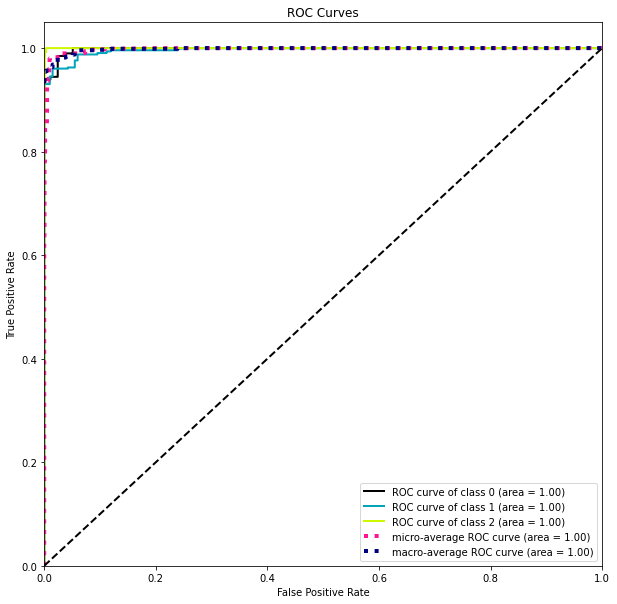

In [201]:
#Plotting an ROC curve
plt.rcParams['figure.figsize'] = [10, 10]
predicted_probas = clf.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(expected, predicted_probas)
plt.show()

array([[<AxesSubplot:xlabel='AQI', ylabel='AQI'>,
        <AxesSubplot:xlabel='SYMPTOM_PRIMARY_encoded', ylabel='AQI'>],
       [<AxesSubplot:xlabel='AQI', ylabel='SYMPTOM_PRIMARY_encoded'>,
        <AxesSubplot:xlabel='SYMPTOM_PRIMARY_encoded', ylabel='SYMPTOM_PRIMARY_encoded'>]],
      dtype=object)

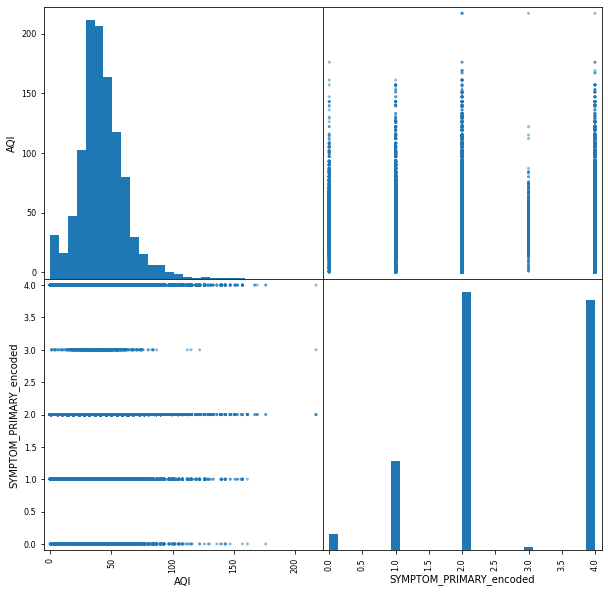

In [202]:
df.drop('Defining_Parameter_encoded',axis=1,inplace=True)
df.drop('Category_encoded',axis=1,inplace=True)

pd.plotting.scatter_matrix(df, hist_kwds={'bins':30})


In [203]:
#Random Forest Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier

#Create the Classifier
clf=RandomForestClassifier(n_estimators=100)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
max_depth=None, max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=0.0, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
oob_score=False, random_state=0, verbose=0, warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [205]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30494
           1       1.00      1.00      1.00     10868
           2       1.00      1.00      1.00       385

    accuracy                           1.00     41747
   macro avg       1.00      1.00      1.00     41747
weighted avg       1.00      1.00      1.00     41747



In [207]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[30494     0     0]
 [    0 10868     0]
 [    0     0   385]]


<AxesSubplot:>

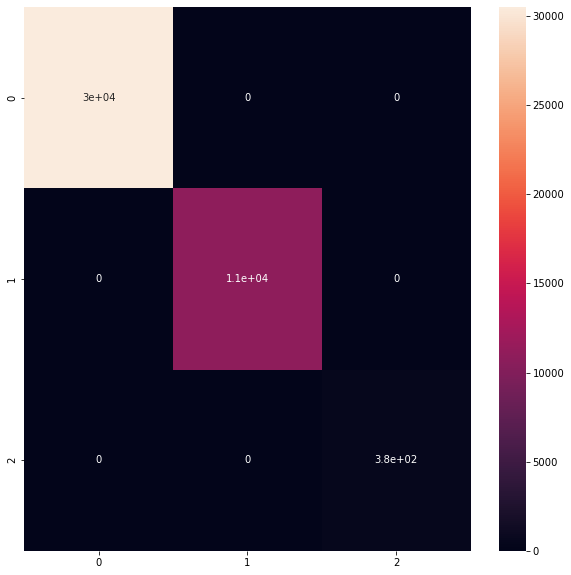

In [208]:
sns.heatmap(cf_matrix, annot=True)

In [209]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

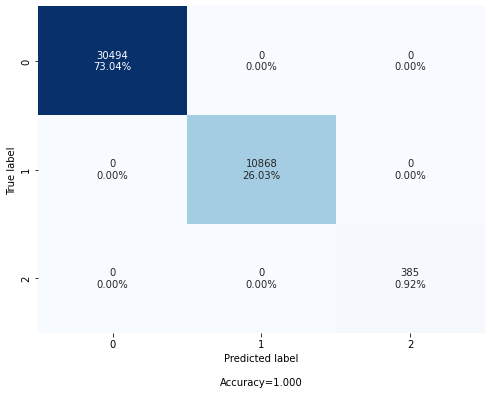

In [210]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)

In [211]:
# Naive Bayes Classifier

In [212]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [213]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9796871631494478


In [214]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30494
           1       1.00      0.92      0.96     10868
           2       0.60      1.00      0.75       385

    accuracy                           0.98     41747
   macro avg       0.86      0.97      0.90     41747
weighted avg       0.98      0.98      0.98     41747



In [215]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[30494     0     0]
 [  588 10020   260]
 [    0     0   385]]


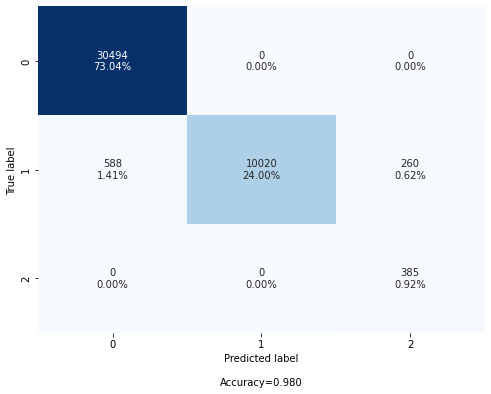

In [216]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)

In [217]:
# Naive Bayes Classifier showing that it isn't able to predict the data with label 1 (Moderate days) accurately. 
# Moderate days were predicted as 0 (Good) and 2 (Unhealthy). Refer to second row.

In [218]:
# SGD Classifier

In [219]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
print(sgdc)
 
sgdc.fit(X_train, y_train)

y_pred = sgdc.predict(X_test)

SGDClassifier()


In [220]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9808369463674036


In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30494
           1       0.95      0.97      0.96     10868
           2       0.00      0.00      0.00       385

    accuracy                           0.98     41747
   macro avg       0.65      0.66      0.65     41747
weighted avg       0.97      0.98      0.98     41747



C:\Users\akshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akshi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[30374   120     0]
 [  295 10573     0]
 [    0   385     0]]


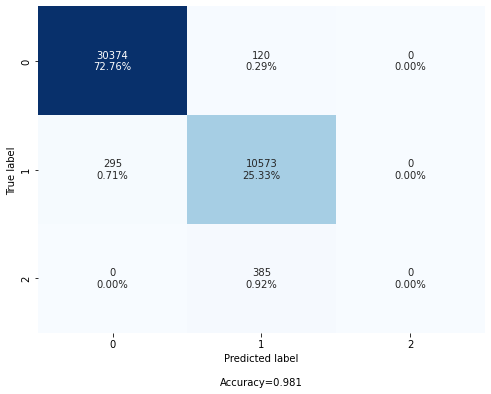

In [223]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)

In [224]:
# XGBoost

In [225]:
!pip install xgboost

In [226]:
from xgboost import XGBClassifier

In [227]:
model = XGBClassifier()
model.fit(X_train, y_train)

[18:11:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akshi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [228]:
y_pred = model.predict(X_test)

In [229]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30494
           1       1.00      1.00      1.00     10868
           2       1.00      1.00      1.00       385

    accuracy                           1.00     41747
   macro avg       1.00      1.00      1.00     41747
weighted avg       1.00      1.00      1.00     41747



In [230]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[30494     0     0]
 [    0 10868     0]
 [    0     0   385]]


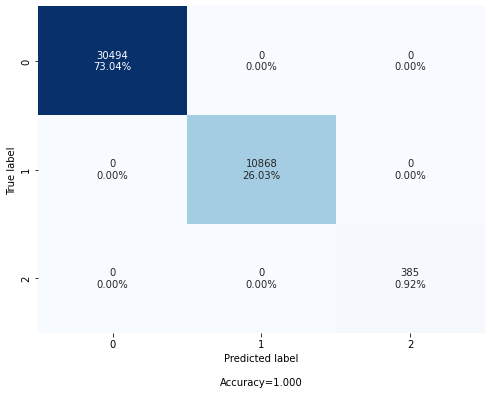

In [231]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)

In [232]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30494
           1       1.00      1.00      1.00     10868
           2       1.00      1.00      1.00       385

    accuracy                           1.00     41747
   macro avg       1.00      1.00      1.00     41747
weighted avg       1.00      1.00      1.00     41747



In [233]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[30494     0     0]
 [    0 10868     0]
 [    0     0   385]]


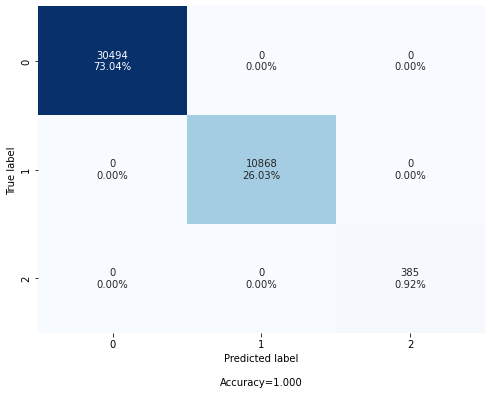

In [234]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)